In [1]:
#Importing the data and files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint


In [2]:
data= pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
print("Shape of the dataset is :",data.shape)
data.head()

Shape of the dataset is : (425, 11)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


##### Dropping the unnamed column

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

##### NullValueCheck

In [4]:
data.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

##### Duplicate value Check and Deletion

In [5]:
print("Shape of the dataset before duplicates deletion is :",data.shape)
print('Number of duplicates in the dataset :',data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Shape of the dataset before duplicates deletion is :",data.shape)

Shape of the dataset before duplicates deletion is : (425, 10)
Number of duplicates in the dataset : 7
Shape of the dataset before duplicates deletion is : (418, 10)


In [6]:
print('********Checking the dtypes*********\n')
print(data.dtypes)
print('----------------------------------------------')
print('\n *********Checking the data info********* \n')
print(data.info())

********Checking the dtypes*********

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object
----------------------------------------------

 *********Checking the data info********* 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      418 non-null    object
 1   Countries                 418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident

From the above, it is clearly evident that all the columns of the data frame are of the type object.

##### Checking the Statistical Description

In [7]:
data.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418,418
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,Project of Vazante that carried out sediment c...
freq,6,248,89,237,309,141,396,185,229,2


In [8]:
#Renaming the data, countries,genre, employee or third party to date, country, gender and nature of employee
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Natureofemployee'}, inplace=True)

In [9]:
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


#### Finding the unique values of all the columns of the dataframe

In [10]:
col = data[data.columns[~data.columns.isin(['Date','Description'])]].columns.tolist()
for cols in col:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')

Unique values for Country is 
['Country_01' 'Country_02' 'Country_03']

Unique values for Local is 
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']

Unique values for Accident Level is 
['I' 'IV' 'III' 'II' 'V']

Unique values for Potential Accident Level is 
['IV' 'III' 'I' 'II' 'V' 'VI']

Unique values for Gender is 
['Male' 'Female']

Unique values for Natureofemployee is 
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values for Critical Risk is 
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 

#### Replacing and Labelling the values of the columns

In [11]:
replace_val = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_val)
replace_val = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}
data['Accident Level'] = data['Accident Level'].map(replace_val)
replace_val = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_val)
del replace_val

In [12]:
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### Changing the date column to date format

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

#### Extracting the month, year and day column to the data.

In [14]:
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())

In [15]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday


#### Function to create month into seasons

In [16]:
# function to create month into seasons
def convert_to_season(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

data['Season'] = data['Month'].apply(convert_to_season)
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer


#### Univariate analysis covering Count, Pie, Scatter, Histogram plots

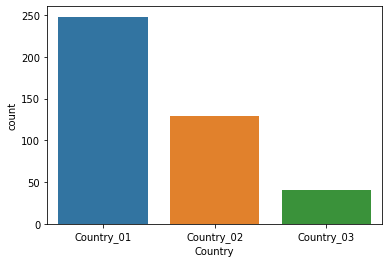

In [17]:
ax = sns.countplot(x="Country", data=data)

From the above, we can conclude the following-
1. The country_01 has a count of about 250.
2. Country _02 has a count of about 125.
3. Country_03 has a count of about 50.
It can be observed that the country_01 has more accidents and country_03 has the least number of accidents.

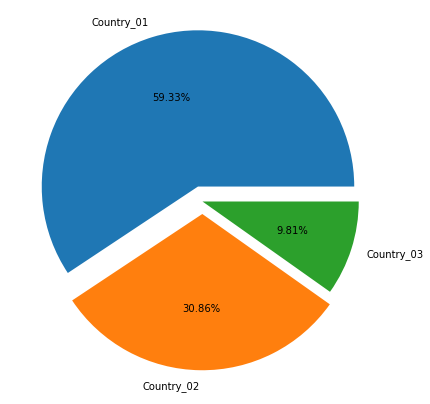

In [18]:
#pie chart
plt.figure(figsize=(7,10))
plt.pie(data['Country'].value_counts(), labels=['Country_01','Country_02','Country_03'], explode=(0.1,0.08,0),autopct = '%1.2f%%');

From the above pie chart, it can be infered that the country _01 is the most affected country with about 59% accidents and country_03 is the least affected country.

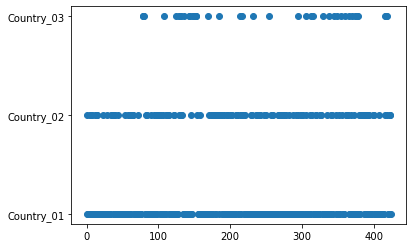

In [19]:
#Scatter plot for country
plt.scatter(data.index,data['Country'])

From the above scatter plot, it can be concluded that the country_01 is more prone to accidents and country_03 is least prone to the accidents

(array([248.,   0.,   0.,   0.,   0., 129.,   0.,   0.,   0.,  41.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

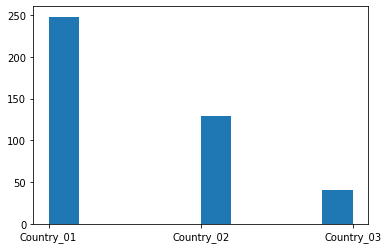

In [20]:
#Histogram
plt.hist(data['Country'])

From the above output, the country_01 has maximum accidents and country_03 has minimum accidents.

##### 2.Local

<AxesSubplot:xlabel='Local', ylabel='count'>

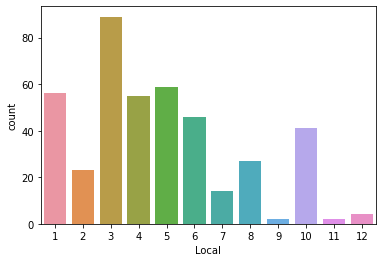

In [21]:
#Count plot
sns.countplot(x=data['Local'])

Most of the accidents happen in Local_03 with a count of about 90.

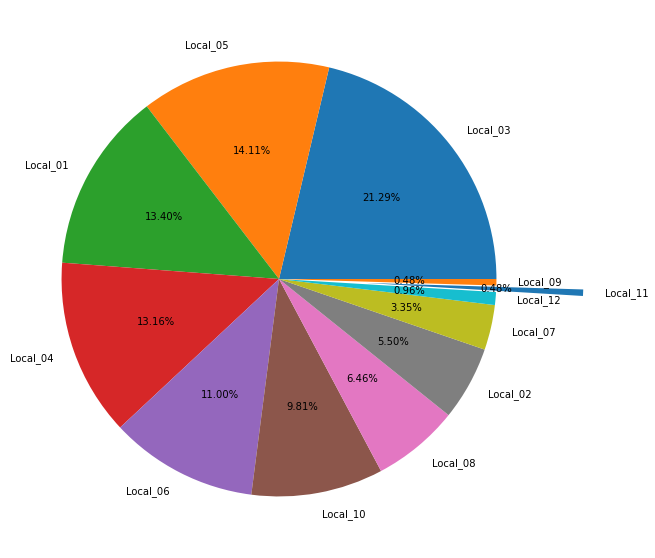

In [22]:
#pie plot
plt.figure(figsize=(10,10))
plt.pie(data['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

Maximum accidents are taken place in local_03 with 21.18% and least accidents are taken place in local_09 and local_11 with 0.47%.

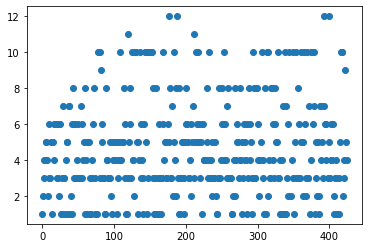

In [23]:
#Scatter plot for local
plt.scatter(data.index,data['Local'])

From the above output, it can be infered that the local_03 is more prone to accidents.

(array([79., 89., 55., 59., 46., 14., 27.,  2., 41.,  6.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

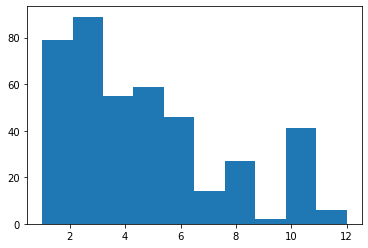

In [24]:
#Histogram
plt.hist(data['Local'])

From the above histogram, it can be observed that the number of accidents in Local_03 are about 90.

##### 3.Industry sector

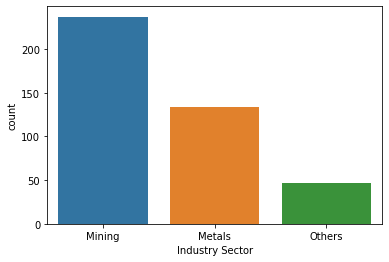

In [25]:
ax = sns.countplot(x="Industry Sector", data=data)


From the above, it is evident that the mining is prone to more accidents with about 250.

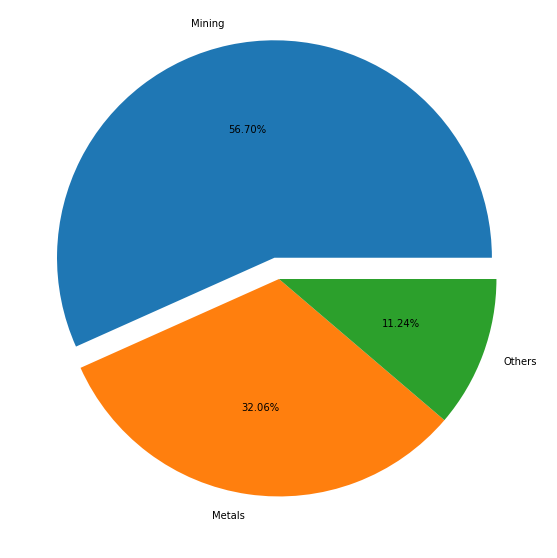

In [26]:
#Pie chart
plt.figure(figsize=(10,10))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'], explode=(0.1,0,0),autopct = '%1.2f%%');

It can be observed that the mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.

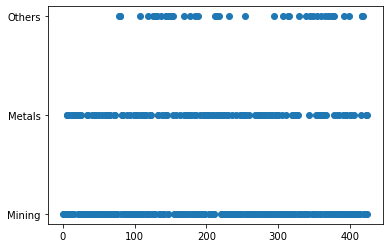

In [27]:
#Scatter plot for industry sector
plt.scatter(data.index,data['Industry Sector'])

(array([237.,   0.,   0.,   0.,   0., 134.,   0.,   0.,   0.,  47.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

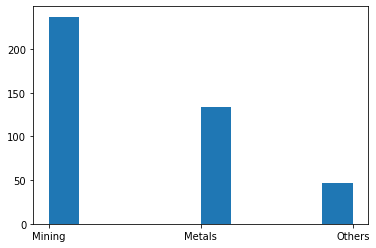

In [28]:
#Histogram
plt.hist(data['Industry Sector'])

It is clearly evident that the mining is prone to more accidents

##### 4.Accident level

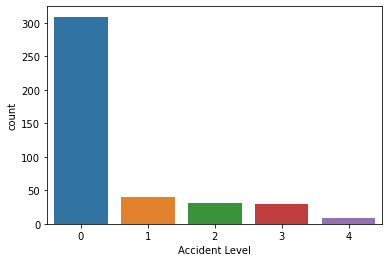

In [29]:
#count plot
ax = sns.countplot(x="Accident Level", data=data)


From the above count plot, it is clearly evident that the most accidents belongs to "Accident Level" I with a count of about more than 300.

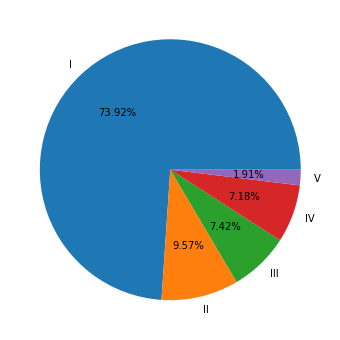

In [30]:
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(data['Accident Level'].value_counts(), labels=['I', 'II', 'III' ,'IV' ,'V'], explode=(0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

From the above pie chart, it can be determined that the maximum accidents are of level 1 equivalent to about 74.3%

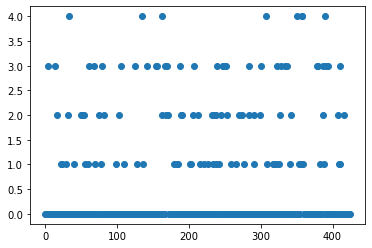

In [31]:
#Scatter plot
plt.scatter(data.index,data['Accident Level'])

(array([309.,   0.,  40.,   0.,   0.,  31.,   0.,  30.,   0.,   8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

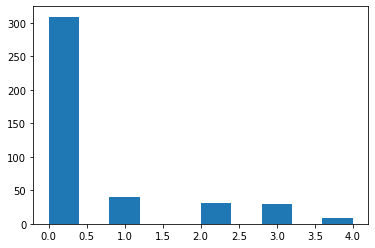

In [32]:
#Histogram
plt.hist(data['Accident Level'])

##### 5.potential accident level

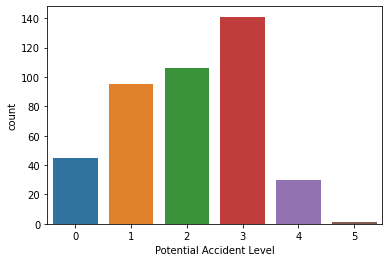

In [33]:
#Count plot
ax = sns.countplot(x="Potential Accident Level", data=data)


From the above count plot, it can be determined that the most "Potential Accident Level" belongs to level IV with a count of about 140.

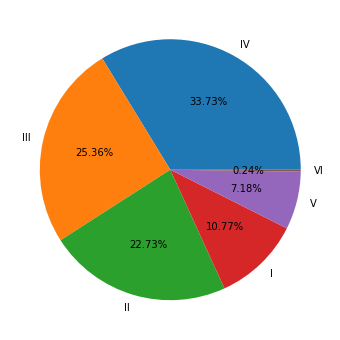

In [34]:
#pie chart
plt.figure(figsize=(6,6))
plt.pie(data['Potential Accident Level'].value_counts(), labels=['IV','III','II','I','V','VI'], explode=(0,0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

From the above pie chart, it is evident that most "Potential Accident Level" belongs to level IV with 33.65%.

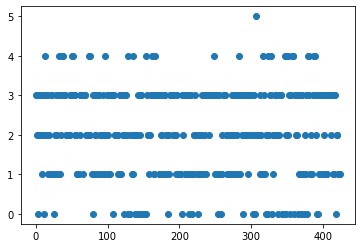

In [35]:
#Scatter plot
plt.scatter(data.index,data['Potential Accident Level'])

(array([ 45.,   0.,  95.,   0., 106.,   0., 141.,   0.,  30.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

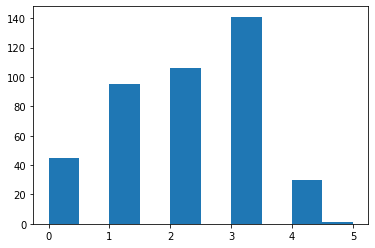

In [36]:
#Histogram
plt.hist(data['Potential Accident Level'])

##### 6.Gender

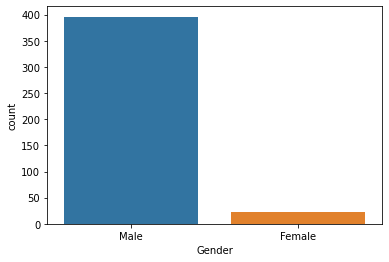

In [37]:
#Count plot
ax = sns.countplot(x="Gender", data=data)

From the above plot, it is evident that Most affected wokers in accidents are male with a count of 400.

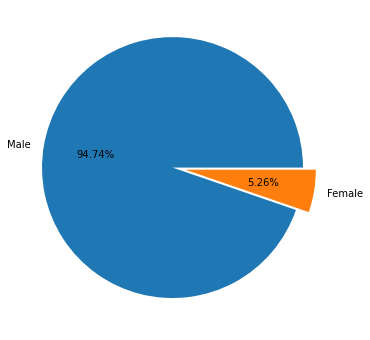

In [38]:
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0.1,0),autopct = '%1.2f%%');


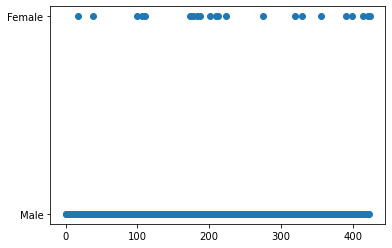

In [39]:
#Scatter plot
plt.scatter(data.index,data['Gender'])

(array([396.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

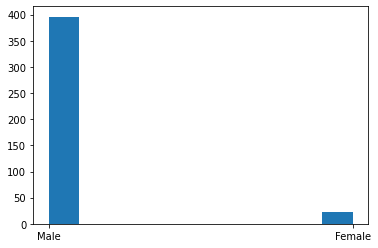

In [40]:
#Histogram
plt.hist(data['Gender'])

##### 7.Nature of the employee

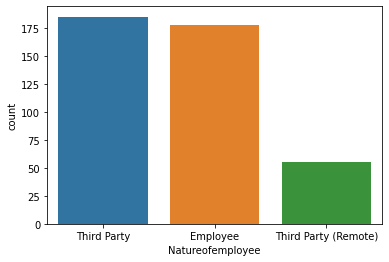

In [41]:
#Count plot
ax = sns.countplot(x="Natureofemployee", data=data)

From the above it can be determined that the employee type of Third party are prone to accidents.

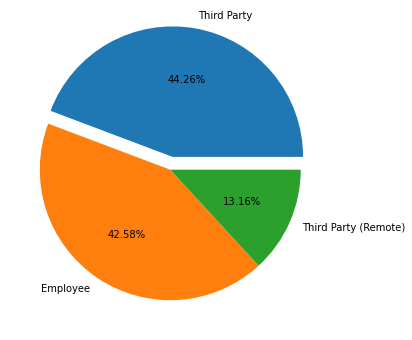

In [42]:
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(data['Natureofemployee'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'], explode=(0.1,0,0),autopct = '%1.2f%%');

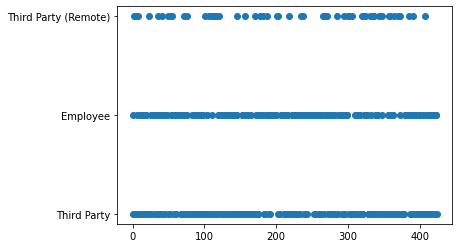

In [43]:
#Scatter plot
plt.scatter(data.index,data['Natureofemployee'])

(array([185.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0.,  55.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

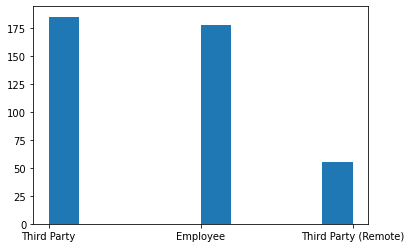

In [44]:
#Histogram
plt.hist(data['Natureofemployee'])

###### 8.Critical risk

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Cut'),
  Text(5, 0, 'Venomous Animals'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Pressurized Systems'),
  Text(11, 0, 'remains of choco'),
  Text(12, 0, 'Fall prevention (same level)'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Liquid Metal'),
  Text(16, 0, 'Blocking and isolation of energies'),
  Text(17, 0, 'Pressurized Systems / Chemical Substances'),
  Text(18, 0, 'Power lock'),
  Text(19, 0, 'Electrical Shock'),
  Text(20, 0, 'Machine Protection'),
  Text(21, 0, 'Individual protection equipment'),
  Text(22, 0, 'Projection/Manual Tools'),
  Text(23, 0, 'Traffic'),
  Text(24

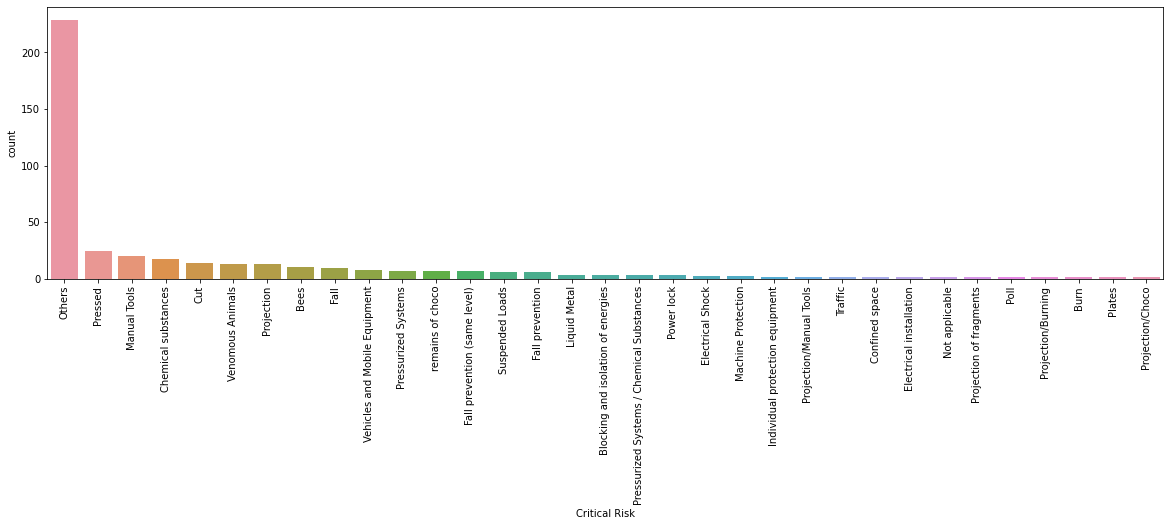

In [45]:
#Count plot
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=descending_order);
plt.xticks(rotation = 'vertical')


When we count the number of incidents by each type of critical risk, Others tops the list.

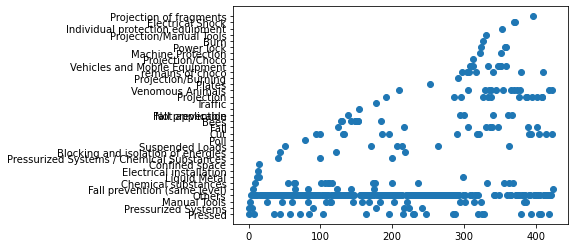

In [46]:
#Scatter plot
plt.scatter(data.index,data['Critical Risk'])

(array([280.,  27.,   5.,  10.,  33.,  21.,  15.,  16.,   6.,   5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

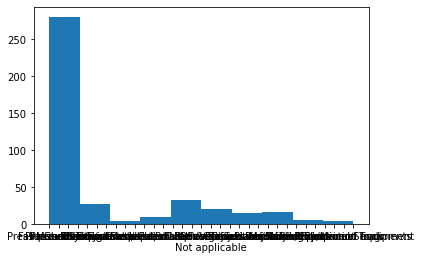

In [47]:
#Histogram
plt.hist(data['Critical Risk'])

###### 9.Year

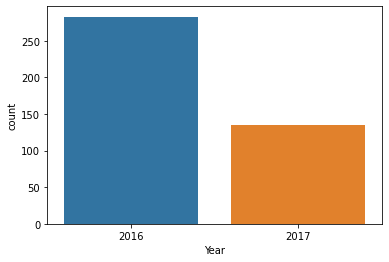

In [48]:
#Countplot
ax = sns.countplot(x="Year", data=data)


From the above, it is clearly evident that most accidents happend in year 2016. i.e- more than 250.

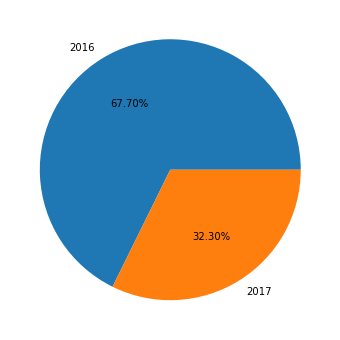

In [49]:
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(data['Year'].value_counts(), labels=['2016', '2017'], explode=(0,0),autopct = '%1.2f%%')

plt.show()

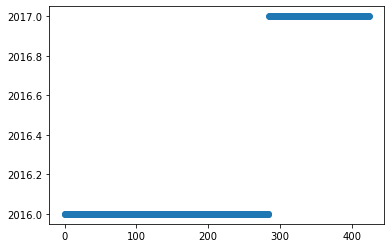

In [50]:
#Scatter plot
plt.scatter(data.index,data['Year'])

(array([283.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 135.]),
 array([2016. , 2016.1, 2016.2, 2016.3, 2016.4, 2016.5, 2016.6, 2016.7,
        2016.8, 2016.9, 2017. ]),
 <BarContainer object of 10 artists>)

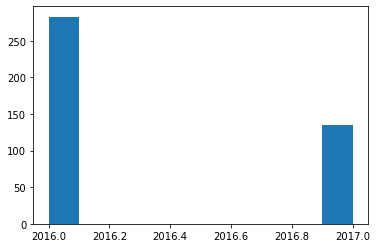

In [51]:
#Histogram
plt.hist(data['Year'])

##### 10.Month

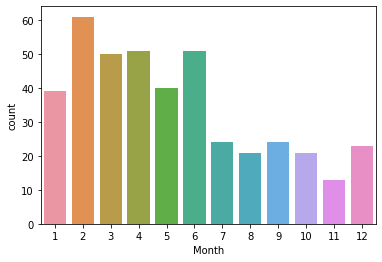

In [52]:
#Count plot
ax = sns.countplot(x="Month", data=data)


From the above, it can be determined that the most accidents are of month Feb.

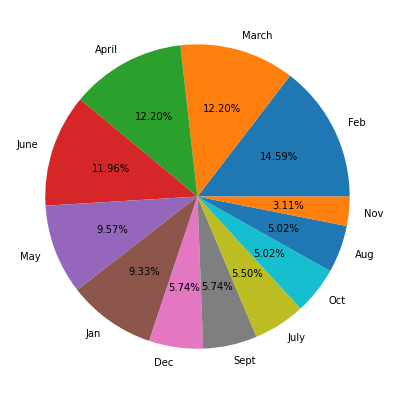

In [53]:
#Pie chart
plt.figure(figsize=(7,7))
plt.pie(data['Month'].value_counts(), labels=['Feb', 'March','April', 'June','May', 'Jan','Dec', 'Sept','July', 'Oct','Aug', 'Nov'], explode=(0,0,0,0,0,0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

From the above, it is evident that most of the accidents happened in feb equivalent to 14.35%.

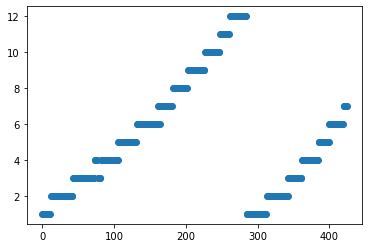

In [54]:
#Scatter plot
plt.scatter(data.index,data['Month'])

(array([100.,  50.,  51.,  40.,  51.,  24.,  21.,  24.,  21.,  36.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

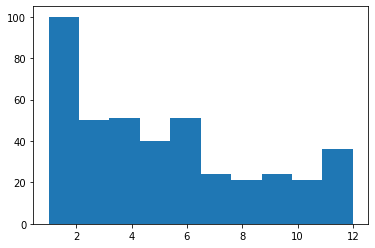

In [55]:
#Histogram
plt.hist(data['Month'])

##### 11.WeekDay

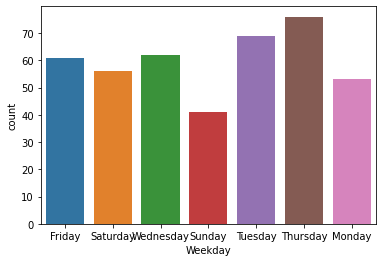

In [56]:
#countplot
ax = sns.countplot(x="Weekday", data=data)

From the above count plot, it can be determined that max accidents happened on thursday with approximately 79 accidents.

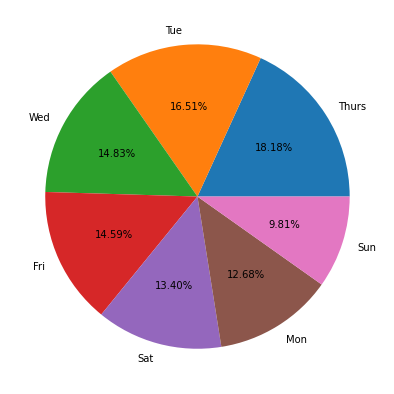

In [57]:
#Piechart
plt.figure(figsize=(7,7))
plt.pie(data['Weekday'].value_counts(), labels=['Thurs', 'Tue','Wed', 'Fri','Sat', 'Mon','Sun'], explode=(0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

From the above piechart, it is evident that most accidents happend in Thursday equivalent to 18.59%

### Bivariate analysis

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

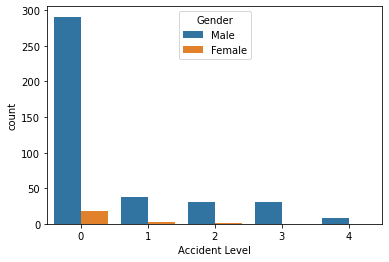

In [58]:
#Gender vs Accident level
sns.countplot(x="Accident Level",hue="Gender", data=data)

From the above count plot, it can be determined that the most of the accidents happened at level I with gender male.

<AxesSubplot:xlabel='Gender', ylabel='Potential Accident Level'>

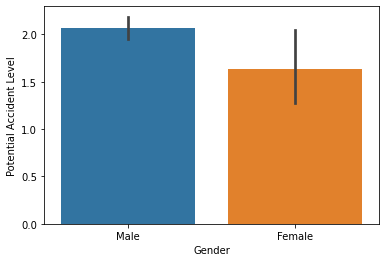

In [59]:
#Gender vs Potential Accident Level
#barplot
sns.barplot(x="Gender", y="Potential Accident Level", data=data)


From the above,it can be determined that most of the potential level accidents happened to male compared to female.

<AxesSubplot:xlabel='Country', ylabel='count'>

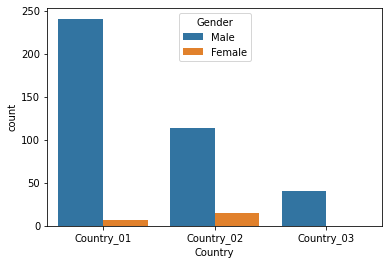

In [60]:
#Gender vs Country
#Countplot
sns.countplot(x="Country",hue="Gender", data=data)

From the above countplot, it can be determined that the maximum number of accidents took place in country_01 to males and they are about 250.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

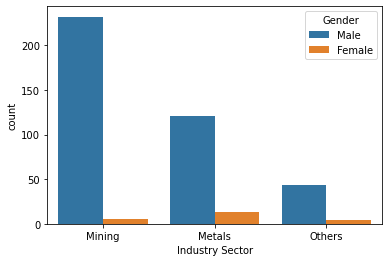

In [61]:
#Gender vs Industry Sector
#count plot to determine the number of accidents happened due to industry sector with their gender
sns.countplot(x="Industry Sector",hue="Gender", data=data)

From the above count plot, it is evident that most of the accidents happened to male in the mining sector. i.e- more than 200.

<AxesSubplot:xlabel='Year', ylabel='count'>

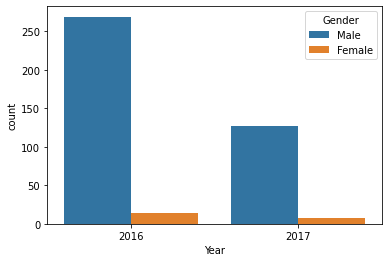

In [62]:
#Gender vs Year
#Countplot to find in which max accidents took place to both female and male
sns.countplot(x="Year",hue="Gender", data=data)


From the above countplot, it is clearly evident that maximum accidents took place in 2016 to the male when compared to female with a count of more than 250.

<AxesSubplot:xlabel='Month', ylabel='count'>

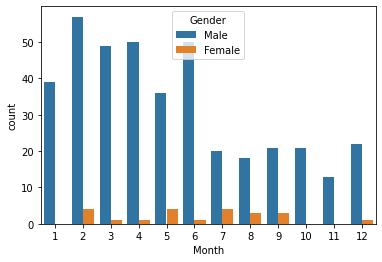

In [63]:
#Gender vs month
#Countplot to determine in which month the maximum accidents took place to both female and males
sns.countplot(x="Month",hue="Gender", data=data)

From the above count plot, it is determined that maximum number of accidents happened to male in the month feb with a count more than 50.

<AxesSubplot:xlabel='Weekday', ylabel='count'>

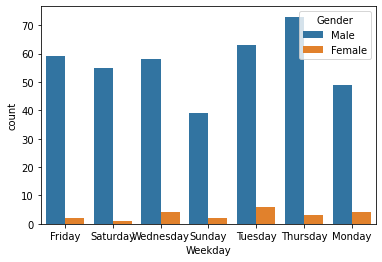

In [64]:
#Gender vs weekday
#Countplot to find out on which day max accidents took place to the both genders
sns.countplot(x="Weekday",hue="Gender", data=data)

From the above count plot, it can be determined that max accidents happened to male on thursday with a count of more than 70.

<AxesSubplot:xlabel='Natureofemployee', ylabel='count'>

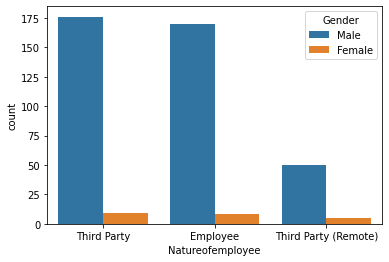

In [65]:
#Gender vs Nature of Employee
#count plot to determine which type of employee and gender faced most of the accidents
sns.countplot(x="Natureofemployee",hue="Gender", data=data)

From the above output, it is clearly evident that maximum accidents happened to third party male employees. i.e- 175.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

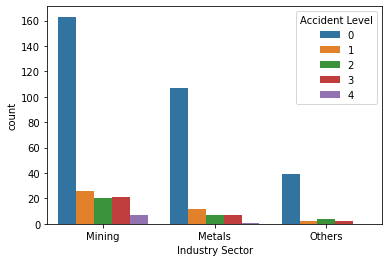

In [66]:
#Industry sector vs accident level
#Countplot to determine the accident level happened at different industry sectors
sns.countplot(x="Industry Sector",hue="Accident Level", data=data)

From the above output of the count plot, it is clearly evident that maximum number of accidents happened in the mining sector with accident Level I. i.e- 160.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

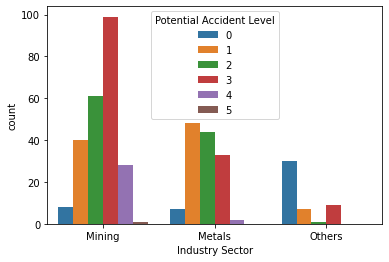

In [67]:
#Industry sector vs potential accident level
#Countplot to determine the potential accident level according to the industry sector
sns.countplot(x="Industry Sector",hue="Potential Accident Level", data=data)

From the above output of the count plot, it is determined that the maximum number of accidents happened in the potential accident level 3 and mining sector with a count if 100. Minimum number of accidents took place in the mining sector at a potential accident level 5.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Pressed'),
  Text(1, 0, 'Pressurized Systems'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Fall prevention (same level)'),
  Text(5, 0, 'Chemical substances'),
  Text(6, 0, 'Liquid Metal'),
  Text(7, 0, 'Electrical installation'),
  Text(8, 0, 'Confined space'),
  Text(9, 0, 'Pressurized Systems / Chemical Substances'),
  Text(10, 0, 'Blocking and isolation of energies'),
  Text(11, 0, 'Suspended Loads'),
  Text(12, 0, 'Poll'),
  Text(13, 0, 'Cut'),
  Text(14, 0, 'Fall'),
  Text(15, 0, 'Bees'),
  Text(16, 0, 'Fall prevention'),
  Text(17, 0, '\nNot applicable'),
  Text(18, 0, 'Traffic'),
  Text(19, 0, 'Projection'),
  Text(20, 0, 'Venomous Animals'),
  Text(21, 0, 'Plates'),
  Text(22, 0, 'Projection/Burning'),
  Text(23, 0, 'remains of choco'),
  Text(24, 0, 'Vehicles and Mobile Equipment'),
  Text(

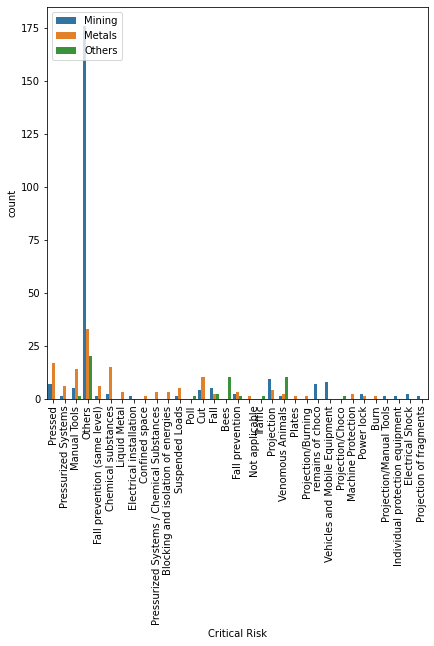

In [68]:
#Industry Sector vs Critical Risk
#Countplot to determine the number of accidents taken place at the industry sector wrt critical risk
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Critical Risk', data = data, ax = ax, orient = 'v',
                  hue = 'Industry Sector')
plt.legend(labels = data['Industry Sector'].unique())
plt.xticks(rotation = 90)

From the above count plot, it is evident that maximum number of accidents happened in mining with a critical risk of others. i.e- about 175

<AxesSubplot:xlabel='Local', ylabel='count'>

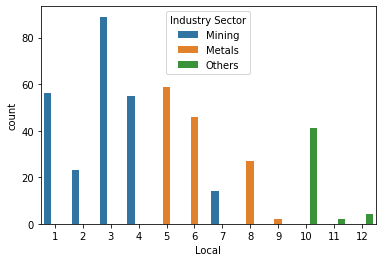

In [69]:
#Industry sector vs Local
#Count plot
sns.countplot(x="Local",hue="Industry Sector", data=data)


From the above output, it can be determined that many accidents happened with a local 3 and industrial sector mining. i.e- more than 80. Least accidents took place with local 11 and industrial sector others.

<AxesSubplot:xlabel='Year', ylabel='count'>

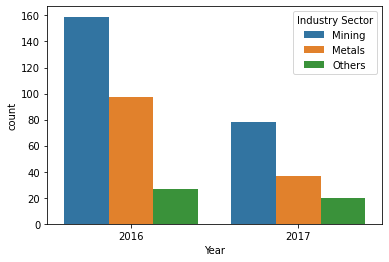

In [70]:
#Industry Sector Vs Year
#Count plot to determine the number of accidents taken place in year 2016 and 2017 according to the industrial sector
sns.countplot(x="Year",hue="Industry Sector", data=data)

#### From the above plot, the following could be determined

1.The number of accidents taken place in year 2016 for mining sector is 160.

2.The number of accidents taken place in year 2016 wrt metals sector is about 100.

3.The number of accidents taken place in the year 2016 wrt others sector is about 30.

Hence, it can be determined that maximum accidents took place in mining sector in the year 2016.

4.The number of accidents taken place in the year 2017 wrt mining sector is 80.

5.The number of accidents taken place in the year 2017 wrt metals sector is about 40.

6.The number of accidents taken place in the year 2017 wrt others sector is 20.

Hence, it can be determined that max accidents took place in mining sector in the year 2017

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

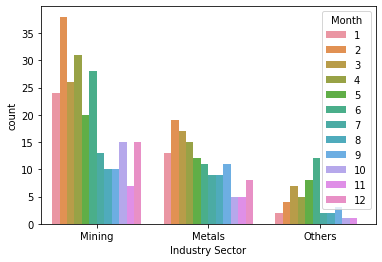

In [71]:
#Industry Sector Vs Month
#Count plot to determine the accidents taken place in all the months wrt industrial sector
sns.countplot(x="Industry Sector",hue="Month", data=data)

From the above count plot, it can be determined that the maximum number of accidents happened in the month feb and mining sector. The least number of accidents took place in the others sector and month december.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

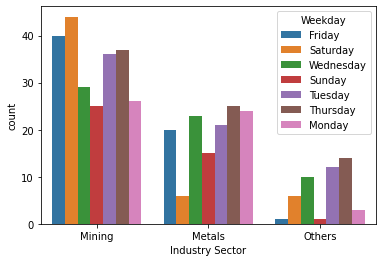

In [72]:
#Industry sector vs Weekday
#Count plot
sns.countplot(x="Industry Sector",hue="Weekday", data=data)

From the above count plot, it can be determined that the maximum number of accidents hapenned on the day saturday in the mining sector. i.e- more than 40. The least number of accidents happened on the day sunday in the others sector.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

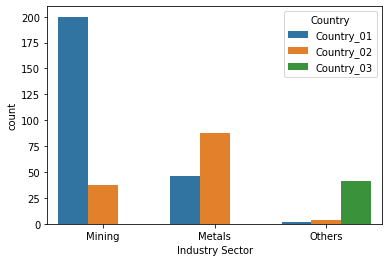

In [73]:
#Industry sector Vs country
#Count plot
sns.countplot(x="Industry Sector",hue="Country", data=data)

From the above count plot, it is evident that the maximum number of accidents took place in country_01 and mining sector.i.e- 200. The least number of accidents took place in country _01 and others sector.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

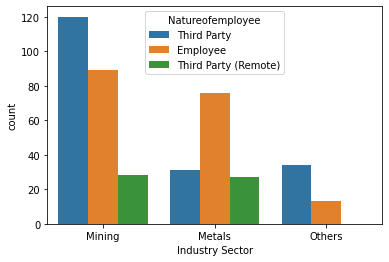

In [74]:
#Industry Sector Vs nature of employee
#count plot
sns.countplot(x="Industry Sector",hue="Natureofemployee", data=data)

From the above count plot, it is clearly evident that the maximum accidents took place in the mining sector with the third party employee type. i.e- about 120. The least number of accidents took place in the others sectors with the nature of employee as employee.

<AxesSubplot:xlabel='Country', ylabel='count'>

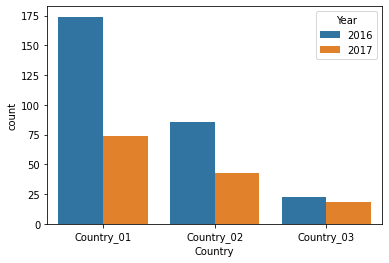

In [75]:
#Country vs Year
#Count plot
sns.countplot(x="Country",hue="Year", data=data)

From the above output, the following can be determined-

1.The number of accidents taken place in country_01 and year 2016 is 175.

2.The number of accidents taken place in country_01 and year 2017 is about 75.

3.The number of accidents taken place in country_02 and year 2016 is more than 75.

4.The number of accidents taken place in country_02 and year 2017 is about 50.

5.The number of accidents taken place in country_03 and year 2016 is about 25.

6.The number of accidents taken place in country_03 and year 2017 is about 25.

<AxesSubplot:xlabel='Country', ylabel='count'>

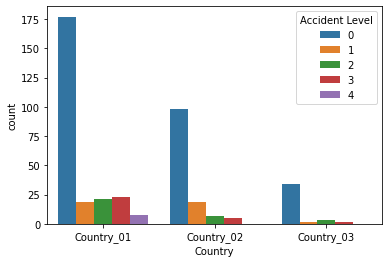

In [76]:
#Country Vs accident level
#count plot
sns.countplot(x="Country",hue="Accident Level", data=data)

From the above count plot, it is clearly evident that the maximum number of accidents took place in accident level 0 and country_01.

<AxesSubplot:xlabel='Country', ylabel='count'>

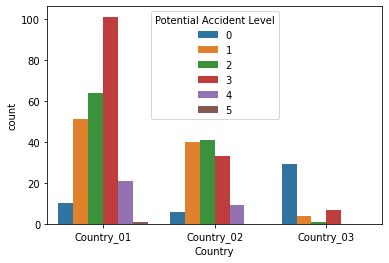

In [77]:
#Country Vs Potential Accident Level
#count plot
sns.countplot(x="Country",hue="Potential Accident Level", data=data)

From the above plot, it is evident that the maximum accidents occurred in country_01 and potential accident level 3.

<AxesSubplot:xlabel='Month', ylabel='count'>

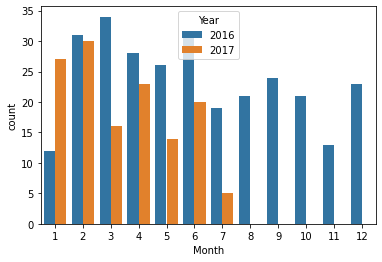

In [78]:
#Year vs month
#count plot
sns.countplot(x="Month",hue="Year", data=data)

From the above plot, it is evident that the max accidents happened in the year 2016 and march.

<AxesSubplot:xlabel='Local', ylabel='count'>

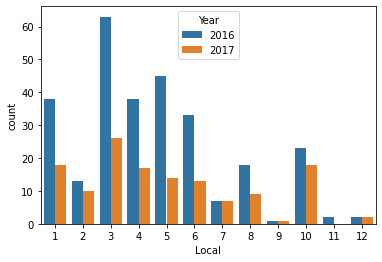

In [79]:
#Year vs Local
#count plot
sns.countplot(x="Local",hue="Year", data=data)

From the above plot, it can be determined that the maximum accidents took place in the local 3 and year 2016.

<AxesSubplot:xlabel='Weekday', ylabel='count'>

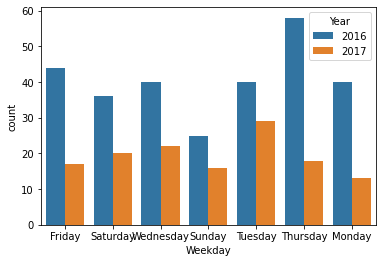

In [80]:
#Year vs Weekday
#countplot
sns.countplot(x="Weekday",hue="Year", data=data)

From the above plot, it is clearly evident that maximum number of accidents took place on thursday and year 2016.

<AxesSubplot:xlabel='Year', ylabel='count'>

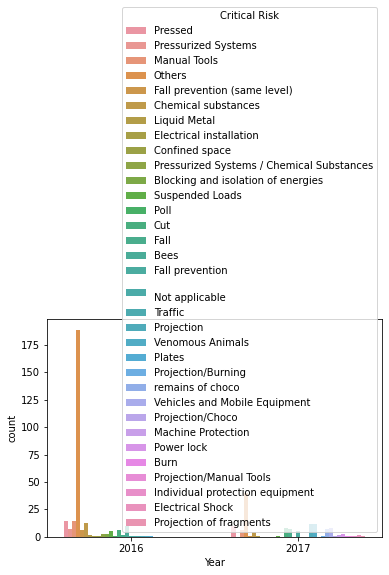

In [81]:
#Year vs Critical Risk
#Count plot
sns.countplot(x="Year",hue="Critical Risk", data=data)

C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accident Level', ylabel='Month'>

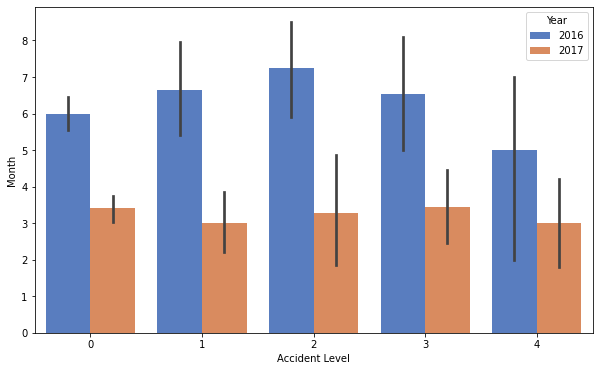

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(data['Accident Level'], data['Month'], hue=data['Year'], palette='muted') 

According to the above output, it can be determined that the most of the accidents took place in 2016 and others.

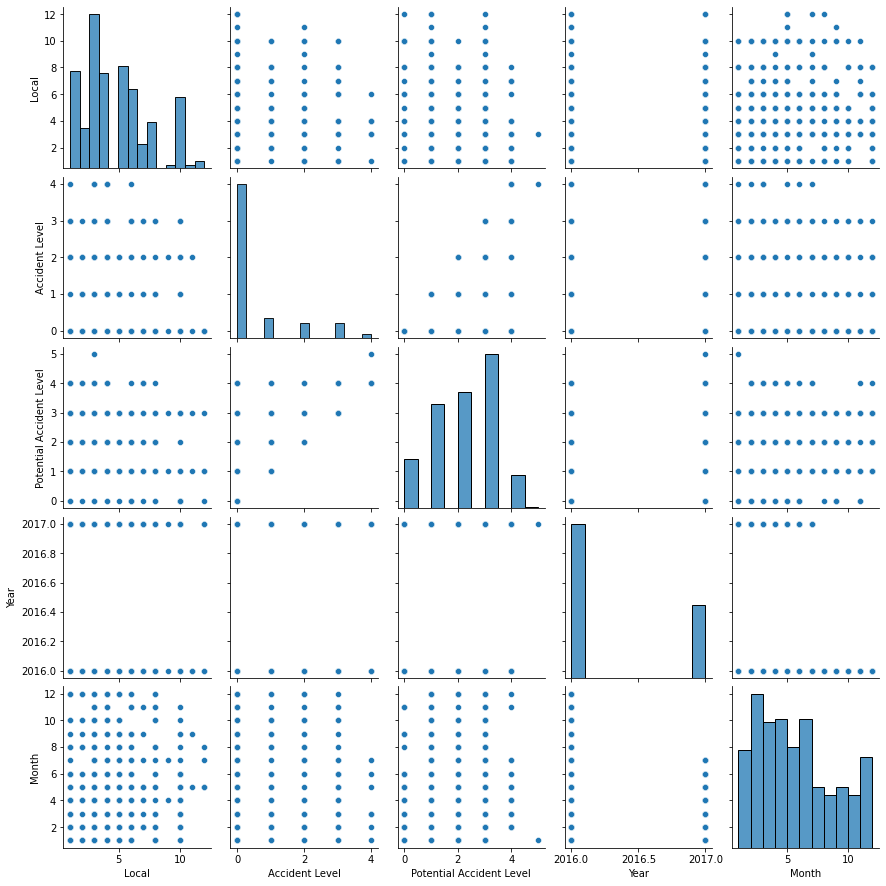

In [83]:
#Multivariate analysis
#Pair plot
sns.pairplot(data)

In [84]:
data.corr()

,Local,Accident Level,Potential Accident Level,Year,Month
Local,1.000000,-0.059122,-0.430469,0.054246,0.019061
Accident Level,-0.059122,1.000000,0.509422,0.043065,0.025572
Potential Accident Level,-0.430469,0.509422,1.000000,0.021809,-0.066601
Year,0.054246,0.043065,0.021809,1.000000,-0.416621
Month,0.019061,0.025572,-0.066601,-0.416621,1.000000


In [88]:
####!pip install pandas_profiling

In [87]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]